In [1]:
import pandas as pd
import numpy as np

import nltk
import re
import unicodedata
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns

import env
import acquire
import prepare

In [39]:
def get_db_url(database, host=env.host, user=env.user, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")


In [40]:
#Clean the text data by label
ham_words = clean_text(' '.join(df[df['label'] == 'ham']['text']))
spam_words = clean_text(' '.join(df[df['label'] == 'spam']['text']))
all_words = clean_text(' '.join(df['text']))

In [42]:
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
topics = ['business', 'sports', 'technology', 'entertainment']
df = pd.DataFrame(acquire.get_news_articles(topics))

In [ ]:
def clean_text(text, extra_stopwords=[]):
    
    wnl = nltk.stem.WordNetLemmatizer()
    
    stopwords = nltk.corpus.stopwords.words('english') + extra_stopwords
    
    clean_text = (unicodedata.normalize('NFKD', text)
                   .encode('ascii', 'ignore')
                   .decode('utf-8', 'ignore')
                   .lower())
    
    words = re.sub(r'[^\w\s]', '', clean_text).split()
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [49]:
all_words = clean_text(' '.join(df['content']))

In [51]:
all_words = pd.Series(all_words).value_counts()

In [53]:
' '.join(df['content'])

'All 10 Adani Group stocks closed higher on Wednesday, the first such occurrence since the report by US short-seller Hindenburg Research in late January that accused the group of fraud. Adani Enterprises led the rally, advancing almost 15% as the group conducted investor meetings in Singapore and Hong Kong. Adani Transmission and Adani Power rose by the 5% daily limit. Hours after the central government raised the price of commercial LPG cylinders by ₹350.50 per unit and domestic LPG cylinders by ₹50 per unit, Union Minister Smriti Irani\'s old tweet from 2011 resurfaced on social media. Her tweet read, "50 rupee hike in LPG!!!!! [And] they call themselves Aam Aadmi ki Sarkar. What a shame!"\n\n Indian-Americans Punit Renjen and Rajesh Subramaniam will be members of US President Joe Biden\'s Export Council. While Renjen serves as Deloitte Global\'s CEO Emeritus, Subramaniam is President & CEO and a board member at FedEx Corporation. In 2023, he received the Pravasi Bharatiya Samman Awa

In [52]:
all_words

said       85
india      65
added      38
test       27
gate       22
           ..
indie       1
west        1
markram     1
aiden       1
balan       1
Length: 1815, dtype: int64

<AxesSubplot:>

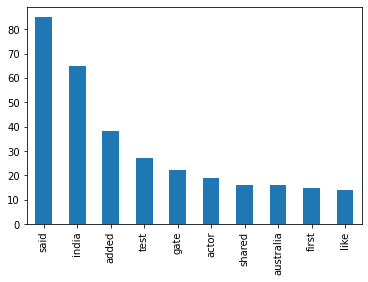

In [56]:
all_words.head(10).plot.bar()

In [18]:
def clean_text(text, extra_stopwords=['r', 'u', '2', 'ltgt']):
    
    wnl = nltk.stem.WordNetLemmatizer()
    
    stopwords = nltk.corpus.stopwords.words('english') + extra_stopwords
    
    clean_text = (unicodedata.normalize('NFKD', text)
                   .encode('ascii', 'ignore')
                   .decode('utf-8', 'ignore')
                   .lower())
    
    words = re.sub(r'[^\w\s]', '', clean_text).split()
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [63]:
all_cloud = WordCloud(background_color='white').generate(' '.join(all_words.index))

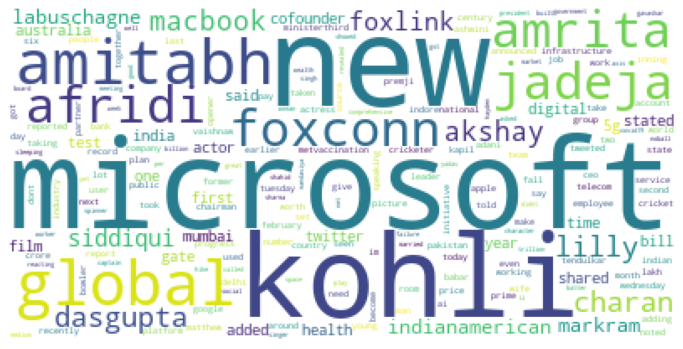

In [64]:
plt.figure(figsize=(12, 8))
plt.imshow(all_cloud)
plt.axis('off')
plt.show()

In [65]:
def income(hr_rate,hrs_week,weeks_year):
    return hr_rate*hrs_week*weeks_year

In [87]:
income(120,15,45)

81000